In [ ]:
from google.colab import files

# Upload Kaggle train/test to google drive
files.upload()


{}

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
keep_this = [
    'GrLivArea',
    'TotalBsmtSF',
    'GarageArea',
    '1stFlrSF',
    'OverallQual',
    'GarageCars',
    'YearBuilt',
    'FullBath',
    'TotRmsAbvGrd',
    'YearRemodAdd',
    'Fireplaces',
    'MasVnrArea',
    'BsmtFinSF1',
    'MoSold',
    'PoolArea',
    '2ndFlrSF',
    'LotArea',
    'BsmtUnfSF',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'ScreenPorch',
    'WoodDeckSF',
    'OpenPorchSF',
    'HalfBath',
    'BsmtFullBath',
    'GarageYrBlt',
    'OverallCond',
    'LotFrontage',
    'EnclosedPorch',
    'LowQualFinSF'
]
df.head()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Numeric columns:", numeric_cols)
print(df.columns,df.shape)


Numeric columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCo

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X = df[keep_this].values
print(X.shape)
y = df["SalePrice"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # X_val, y_val for validation


(1460, 30)


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_impute = imputer.fit_transform(X_train)
X_val_impute = imputer.transform(X_val)

y_train_impute = imputer.fit_transform(y_train.reshape(-1, 1))
y_val_impute = imputer.transform(y_val.reshape(-1, 1))

In [ ]:
X_train_impute.shape

(1168, 30)

In [ ]:
import numpy as np
mean_value = np.mean(X_train_impute)
print("X_train_impute mean:", np.mean(X_train_impute), "std:", np.std(X_train_impute))
print("y_train_impute mean:", np.mean(y_train_impute), "std:", np.std(y_train_impute))

X_train_impute mean: 754.2275006741747 std: 2778.9022771467094
y_train_impute mean: 181441.5419520548 std: 77230.50161542717


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train_impute.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
history = model.fit(X_train_impute, y_train_impute,
          validation_data=(X_val_impute, y_val_impute),
          epochs=100, batch_size=35)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 40632762368.0000 - mae: 185165.3281 - val_loss: 39019634688.0000 - val_mae: 177191.7656
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38955458560.0000 - mae: 181596.7344 - val_loss: 38087995392.0000 - val_mae: 174742.6875
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36769296384.0000 - mae: 175195.4375 - val_loss: 36127592448.0000 - val_mae: 169446.4844
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33383307264.0000 - mae: 167716.6562 - val_loss: 31563728896.0000 - val_mae: 156378.3906
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27998771200.0000 - mae: 151777.8750 - val_loss: 23449282560.0000 - val_mae: 129573.3594
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19971444736.0000 - mae: 121449.2266 - val_loss: 14802283520.0000 - val_mae: 95447.1406
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13599828992.0000 - mae: 88751.1953 - val_loss: 10550010880.

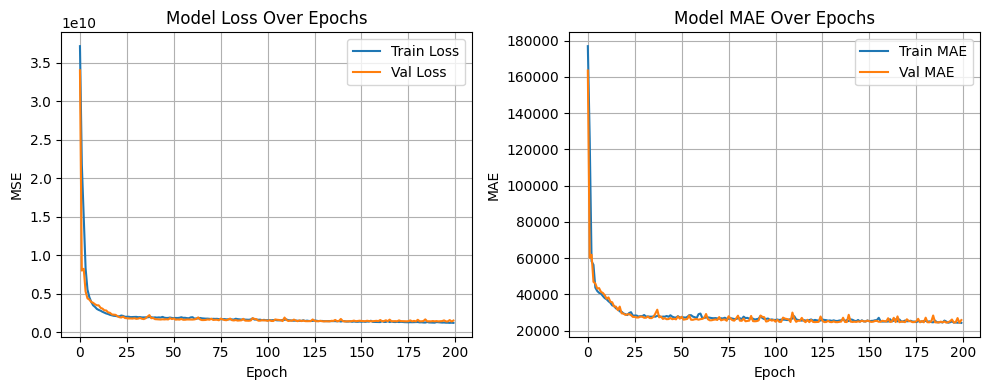

In [ ]:
# Plot loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


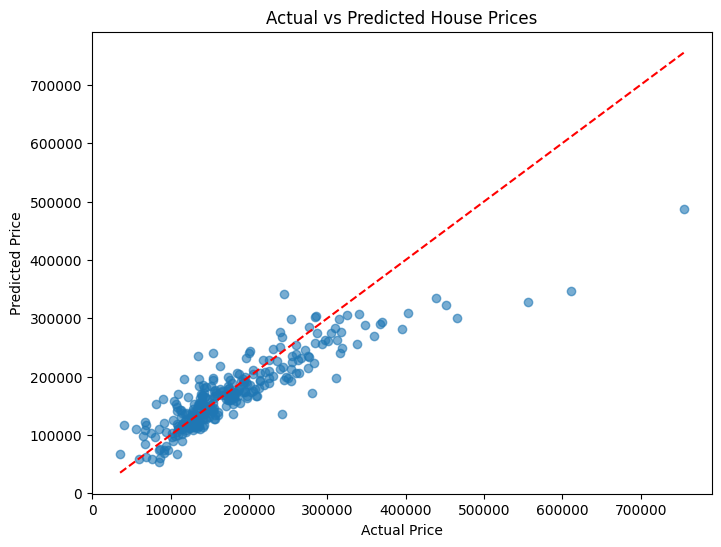

In [ ]:
y_pred = model.predict(X_val_impute)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val_impute, y_pred, alpha=0.6)
plt.plot([y_val_impute.min(), y_val_impute.max()], [y_val_impute.min(), y_val_impute.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
test_df = pd.read_csv("test.csv")
print(test_df.columns)
test_df = test_df[keep_this].values
print(test_df.shape)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:

test_result = model.predict(test_df)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
test_result = test_result.flatten()

test_result = np.where(np.isnan(test_result), mean_value, test_result)
print(test_result)

[141891.6875     190062.375      190189.78125    ... 185181.6875
    754.22750067 227079.984375  ]


In [ ]:


test_df = pd.read_csv("test.csv")
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_result
})
submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>